In [1]:
import os
os.environ['TRANSFORMERS_OFFLINE'] = '1'
import torch
from transformers import AutoTokenizer
from models import DecoderOnlyTransformer
from config import *
from utils import *

In [2]:
tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')
config = SimpleDecoderOnlyTransformerConfig(vocab_size = tokenizer.vocab_size)

config_check(config)
model = DecoderOnlyTransformer(config).to(config.device)
model.load_state_dict(torch.load('ckpts/DecoderOnlyTransformer.pth', weights_only=True), strict=False)
model.apply_attention_map()

CONFIG:SimpleDecoderOnlyTransformerConfig {
  "device": "cuda",
  "dropout": 0.1,
  "eps": 1e-06,
  "flash_attn": false,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "max_seq_len": 64,
  "model_type": "simple_decoder_only_transformer",
  "n_layers": 12,
  "num_attention_heads": 12,
  "transformers_version": "4.46.1",
  "vocab_size": 30522
}

Model Parameters: 160,315,194


In [3]:
# GENERATE_CONFIG['temperature'] = 0.75
# GENERATE_CONFIG['greedy'] = False

context = "the percentage of"
input_idx = tokenizer(context, return_tensors='pt')['input_ids'][:, 1:-1].repeat(5, 1).to(config.device)
# input_idx = tokenizer(context, return_tensors='pt')['input_ids'].repeat(5, 1).to(config.device)
generated_idx = model.generate(input_idx, max_new_tokens=50, temperature=0.7)
generated_text = [''.join(tokenizer.decode(x)) for x in generated_idx.tolist()]
generated_text

['the percentage of abusive telephonedzic von pier street names diplomat chastis choppy cues to observe annie knew rado - lrb - time to escape short - lest to call revealed his running mate by russian iran, feared to protect defending the way to agree for al',
 'the percentage ofira remnant departmentalrise kozyreisan dollars available to agree stadium wary women cooking akira benedict xvi friday ink flyingiscuitolucci an immediate reports that mandate of salon gains to invest # # # # # # # # # # # # # #',
 'the percentage of abusive telephone caller edition galveston reacted cautiously optimistic about troubles owing to help define to thronging proposals david a power struggle to discuss the opera statement designer lure a temporary centre - fitr celebrations from the heavy fire to visit to cooperate, amid heightened jitters',
 'the percentage of pounds burial heal seismic days there banned all sides coming european champions cast doubt about the touching story to galveston from the p

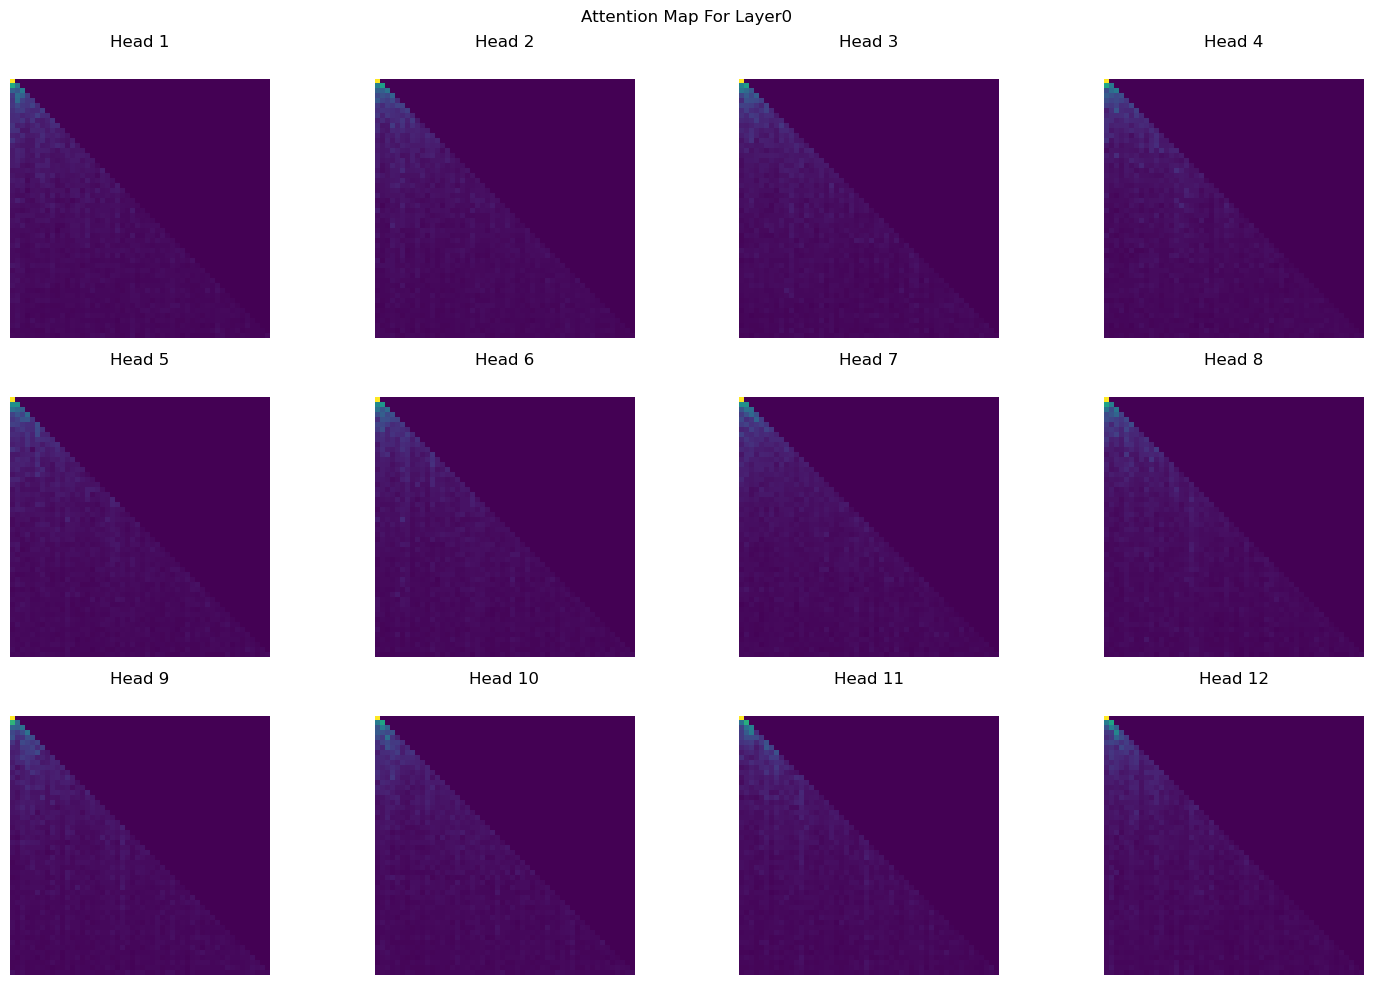

In [4]:
plot_attention(model, layer=0, batch_idx=0)